# Beer and USA

In [2]:
from src.data.save_tar_gz import tar_gz_to_csv
import warnings
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# put the tar.tz files in the data/ folder
warnings.filterwarnings("ignore")
data = tar_gz_to_csv(load_path= 'data/', save_path='data/raw/', load_text = False)
warnings.filterwarnings("default")

In [4]:
print(data.keys())

dict_keys(['BeerAdvocate_beers.csv', 'BeerAdvocate_users.csv', 'BeerAdvocate_breweries.csv', 'matched_beer_data_ratings.csv', 'matched_beer_data_users_approx.csv', 'matched_beer_data_users.csv', 'matched_beer_data_beers.csv', 'matched_beer_data_breweries.csv', 'RateBeer_beers.csv', 'RateBeer_users.csv', 'RateBeer_breweries.csv'])


In [4]:
users_matched = data['matched_beer_data_users.csv']
users_ba = data['BeerAdvocate_users.csv']
users_rb = data['RateBeer_users.csv']
users_ba = users_ba.dropna(subset=['location'])
users_rb = users_rb.dropna(subset=['location'])

In [5]:
users_matched_usa = users_matched[users_matched['ba.1'].str.startswith('United States')]
users_ba_usa = users_ba[users_ba['location'].str.startswith('United States')]
users_rb_usa = users_rb[users_rb['location'].str.startswith('United States')]


print(f"Number of matched users in USA: {users_matched_usa.shape[0]}")
print(f"Number of BeerAdvocate users in USA: {users_ba_usa.shape[0]}")
print(f"Number of RateBeer users in USA: {users_rb_usa.shape[0]}")

Number of matched users in USA: 2442
Number of BeerAdvocate users in USA: 113223
Number of RateBeer users in USA: 26855


USA states represented in BeerAdvocate: 50
USA states represented in RateBeer: 50
Number of users per state in BeerAdvocate: location
California        11638
Pennsylvania       8689
New York           7432
Illinois           6866
Massachusetts      6658
Texas              5893
Ohio               4776
Florida            4604
Michigan           4213
New Jersey         3716
Virginia           3604
North Carolina     3405
Washington         2891
Minnesota          2854
Connecticut        2792
Indiana            2644
Georgia            2633
Wisconsin          2375
Maryland           2335
Colorado           2326
Missouri           1703
Oregon             1629
Arizona            1317
South Carolina     1309
Tennessee          1308
Kentucky           1203
New Hampshire      1171
Alabama            1026
Iowa               1010
Maine               888
Vermont             779
Rhode Island        778
Oklahoma            736
Louisiana           732
Kansas              728
Nebraska            496
Ne

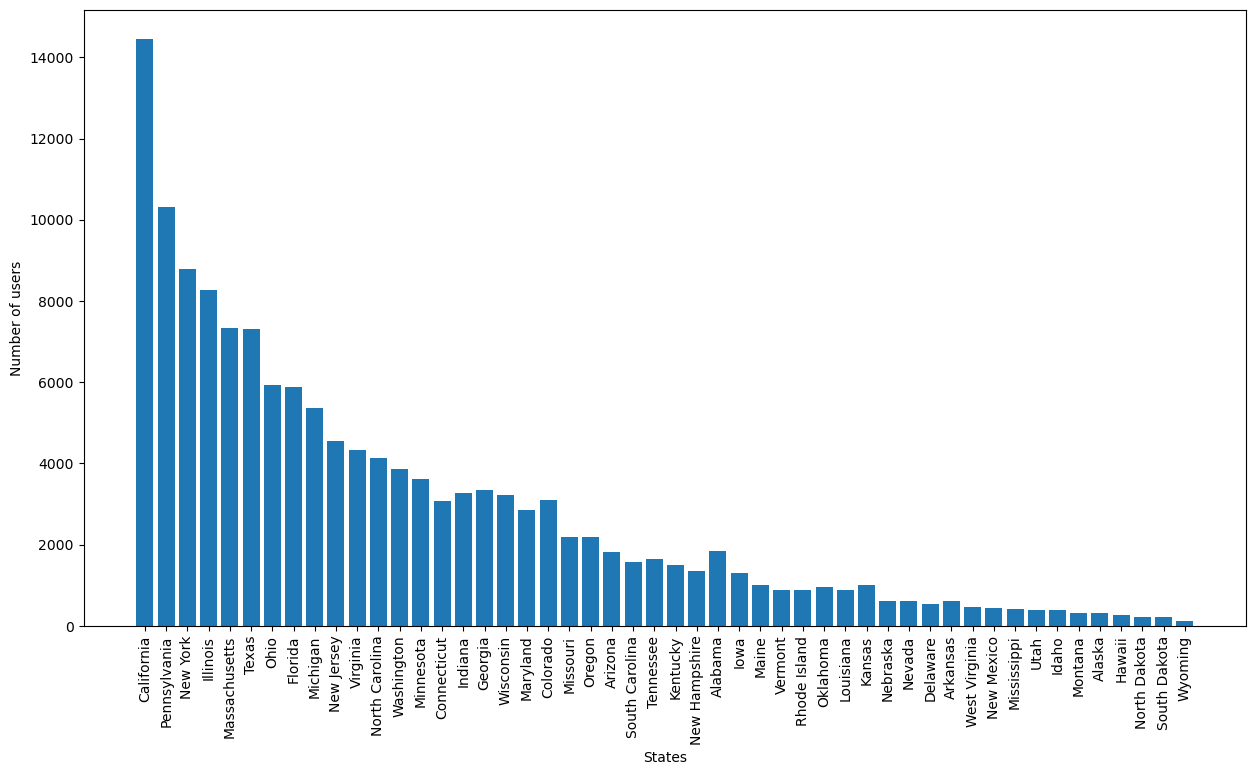

In [10]:
states_usa_ba = users_ba_usa['location'].apply(lambda x: x.split(', ')[1])
states_usa_rb = users_rb_usa['location'].apply(lambda x: x.split(', ')[1])

print(f"USA states represented in BeerAdvocate: {len(states_usa_ba.unique())}")
print(f"USA states represented in RateBeer: {len(states_usa_rb.unique())}")

print(f"Number of users per state in BeerAdvocate: {states_usa_ba.value_counts()}")
print(f"Number of users per state in RateBeer: {states_usa_rb.value_counts()}")

users_per_state_ba = states_usa_ba.value_counts().to_dict()
users_per_state_rb = states_usa_rb.value_counts().to_dict()
users_per_state_barb = {k: (users_per_state_ba[k] + users_per_state_rb[k]) for k in users_per_state_ba.keys()}

states = users_per_state_barb.keys()
users = users_per_state_barb.values()

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(states, users)
ax.set_ylabel('Number of users')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.show()



In [7]:
breweries_matched = data['matched_beer_data_breweries.csv']
breweries_ba = data['BeerAdvocate_breweries.csv']
breweries_rb = data['RateBeer_breweries.csv']
breweries_ba = breweries_ba.dropna(subset=['location'])
breweries_rb = breweries_rb.dropna(subset=['location'])

In [8]:
breweries_matched_usa = breweries_matched[breweries_matched['ba.1'].str.startswith('United States')]
breweries_ba_usa = breweries_ba[breweries_ba['location'].str.startswith('United States')]
breweries_rb_usa = breweries_rb[breweries_rb['location'].str.startswith('United States')]


print(f"Number of matched breweries in USA: {breweries_matched_usa.shape[0]}")
print(f"Number of BeerAdvocate breweries in USA: {breweries_ba_usa.shape[0]}")
print(f"Number of RateBeer breweries in USA: {breweries_rb_usa.shape[0]}")

Number of matched breweries in USA: 3956
Number of BeerAdvocate breweries in USA: 7431
Number of RateBeer breweries in USA: 6921


USA states with breweries represented in BeerAdvocate: 50
USA states with breweries represented in RateBeer: 50
Number of breweries per state in BeerAdvocate: location
California        929
Washington        411
New York          406
Colorado          404
Pennsylvania      328
Michigan          321
Florida           297
Oregon            295
Texas             280
Illinois          266
North Carolina    249
Virginia          229
Ohio              225
Wisconsin         219
Minnesota         185
Massachusetts     179
Indiana           172
Missouri          123
Arizona           113
Maryland          110
Maine             106
New Jersey        106
Connecticut       102
Tennessee          92
Vermont            92
Georgia            87
Iowa               85
New Mexico         79
New Hampshire      76
Montana            72
South Carolina     71
Idaho              70
Kentucky           58
Nevada             55
Kansas             46
Alabama            45
Alaska             44
Nebraska          

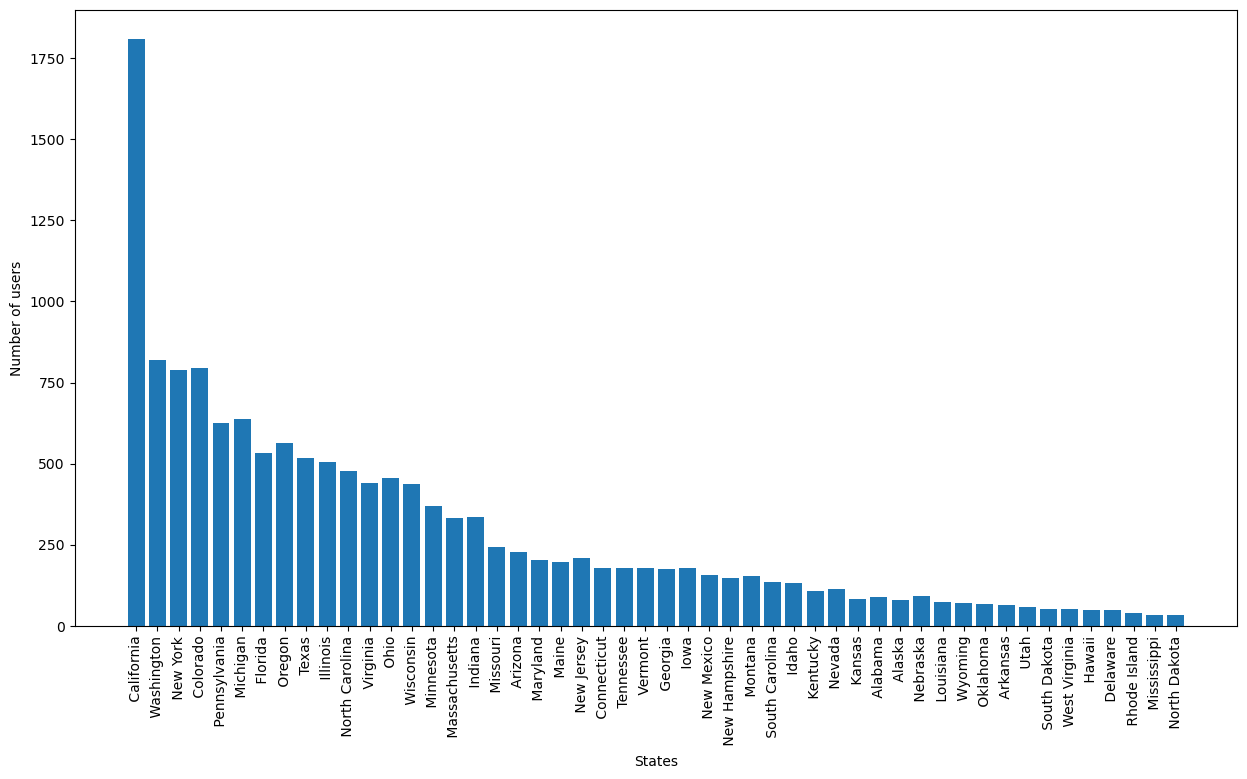

In [9]:
breweries_name_split_ba = breweries_ba_usa['location'].apply(lambda x: len(x.split(',')))
breweries_filtered_ba = breweries_ba_usa[breweries_name_split_ba == 2]
breweries_filtered_ba = breweries_filtered_ba[breweries_filtered_ba['location'] != 'United States, United States']
breweries_per_states_ba = breweries_filtered_ba['location'].apply(lambda x: x.split(',')[1])

breweries_name_split_rb = breweries_rb_usa['location'].apply(lambda x: len(x.split(',')))
breweries_filtered_rb = breweries_rb_usa[breweries_name_split_rb == 2]
breweries_filtered_rb['location'] = breweries_filtered_rb['location'].mask(breweries_filtered_rb['location'] == 'United States, Washington DC', 'United States, California')
breweries_per_states_rb = breweries_filtered_rb['location'].apply(lambda x: x.split(',')[1])

print(f"USA states with breweries represented in BeerAdvocate: {len(breweries_per_states_ba.unique())}")
print(f"USA states with breweries represented in RateBeer: {len(breweries_per_states_rb.unique())}")

print(f"Number of breweries per state in BeerAdvocate: {breweries_per_states_ba.value_counts()}")
print(f"Number of breweries per state in RateBeer: {breweries_per_states_rb.value_counts()}")

breweries_per_state_ba = breweries_per_states_ba.value_counts().to_dict()
breweries_per_state_rb = breweries_per_states_rb.value_counts().to_dict()
breweries_per_state_barb = {k: (breweries_per_state_ba[k] + breweries_per_state_rb[k]) for k in breweries_per_state_ba.keys()}

states = breweries_per_state_barb.keys()
users = breweries_per_state_barb.values()

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(states, users)
ax.set_ylabel('Number of users')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.show()

